# Preprocessing

In [120]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter_stemmer  = PorterStemmer()
import re
import inflect
stop_words=set(stopwords.words('english'))
def Pre_Processing(file):
    token_files=[] 
    after_lower=[]
    after_lemmatizer=[]
    after_stemming=[]
    tokenizer = RegexpTokenizer(r'\w+')
    tokens=(tokenizer.tokenize(file))
#     p = inflect.engine()
#     token_files=[]
#     for i in range(len(tokens)):
#         if tokens[i].isnumeric() and len(tokens[i])<36:
#             tem=p.number_to_words((tokens[i]))
#             tokenizer = RegexpTokenizer(r'\w+')
#             temp=(tokenizer.tokenize(tem))
#             for x in temp:
#                 token_files.append(x)
#         elif tokens[i].isnumeric() and len(tokens[i])>36:
#             for j in range(len(tokens[i])):
#                 token_files.append(p.number_to_words((tokens[i][j])))
#         else:
#             token_files.append(tokens[i])
    for i in range(len(tokens)):
        after_lower.append(tokens[i].lower())
    after_lower=[x for x in after_lower if x not in stop_words ]
    for i in range(len(after_lower)):
        after_lemmatizer.append(wordnet_lemmatizer.lemmatize(after_lower[i]))
        #after_stemming.append(porter_stemmer.stem(after_lower[i]))
    return after_lemmatizer

# Train-Test Split

In [121]:
import os
import math
import codecs
TF_Dictionary={}
Docid=[]
Class_dict={}
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        if file_name in Class_dict:
            Class_dict[file_name].append(doc)
        else:
            Class_dict[file_name]=[doc]
        Docid.append(doc)

In [122]:
train=[]
test=[]
# Class_dict=random.shuffle(Class_dict.values())
for term in Class_dict:
    train.append(Class_dict[term][:int((len(Class_dict[term])+1)*.50)])
    test.append(Class_dict[term][int(len(Class_dict[term])*.50):])

In [123]:
train_data=[]
test_data=[]
for i in range(len(train)):
    for j in range(len(train[i])):
        train_data.append(train[i][j])
for i in range(len(test)):
    for j in range(len(test[i])):
        test_data.append(test[i][j])

In [124]:
c=0
for i in range(len(train_data)):
    for j in range(len(test_data)):
        if(train_data[i]==test_data[j]):
            c=c+1
print(c)


0


In [125]:
print(len(train_data))
print(len(test_data))

2500
2500


In [126]:
print(train_data)

['comp.graphics/37261', 'comp.graphics/37913', 'comp.graphics/37914', 'comp.graphics/37915', 'comp.graphics/37916', 'comp.graphics/37917', 'comp.graphics/37918', 'comp.graphics/37919', 'comp.graphics/37920', 'comp.graphics/37921', 'comp.graphics/37922', 'comp.graphics/37923', 'comp.graphics/37924', 'comp.graphics/37925', 'comp.graphics/37926', 'comp.graphics/37927', 'comp.graphics/37928', 'comp.graphics/37929', 'comp.graphics/37930', 'comp.graphics/37931', 'comp.graphics/37932', 'comp.graphics/37933', 'comp.graphics/37934', 'comp.graphics/37935', 'comp.graphics/37936', 'comp.graphics/37937', 'comp.graphics/37938', 'comp.graphics/37939', 'comp.graphics/37940', 'comp.graphics/37941', 'comp.graphics/37942', 'comp.graphics/37943', 'comp.graphics/37944', 'comp.graphics/37945', 'comp.graphics/37946', 'comp.graphics/37947', 'comp.graphics/37948', 'comp.graphics/37949', 'comp.graphics/37950', 'comp.graphics/37951', 'comp.graphics/37952', 'comp.graphics/37953', 'comp.graphics/37954', 'comp.grap

# Feature Vector

In [127]:
import os
import math
import codecs
TF_Dictionary={}
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        preprossed_file=[]
        Normalized_TF={}
        if doc in train_data:
            fd=codecs.open(parent+'/'+file_name+'/'+file,'r',errors='ignore',encoding='utf-8')
            preprossed_file=Pre_Processing(fd.read())
            for i in range(len(preprossed_file)):

                if preprossed_file[i] in Normalized_TF:
                    Normalized_TF[preprossed_file[i]]+=1
                else:
                    Normalized_TF[preprossed_file[i]]=1
            
            for i in range(len(preprossed_file)):
                if preprossed_file[i] in TF_Dictionary:
                    TF_Dictionary[preprossed_file[i]][doc]=Normalized_TF[preprossed_file[i]]
                else:
                    TF_Dictionary[preprossed_file[i]] = {doc:Normalized_TF[preprossed_file[i]]}

       

In [128]:
print(len(Doc_Vec['comp.graphics/37261']))

199


In [129]:
import os
import math
import codecs
Doc_Vec={}
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        preprossed_file=[]
        Normalized_TF={}
        if doc in train_data:
            fd=codecs.open(parent+'/'+file_name+'/'+file,'r',errors='ignore',encoding='utf-8')
            preprossed_file=Pre_Processing(fd.read())
            for i in range(len(preprossed_file)):
                if preprossed_file[i] in Normalized_TF:
                    Normalized_TF[preprossed_file[i]]+=1
                else:
                    Normalized_TF[preprossed_file[i]]=1
#             for term in Normalized_TF:
#                 IDF=1+math.log(len(train_data)/len(TF_Dictionary[term]))
#                 Normalized_TF[term]*=IDF
            Normalized_TF={k: v/len(preprossed_file) for k,v in Normalized_TF.items()}
            Doc_Vec[doc]=Normalized_TF

In [130]:
import os
import math
import codecs
Test_Doc_Vec={}
parent="C:/Users/Devashi Jain/Desktop/IIIT-D/Information Retrieval/Assignment4/Classes"
for file_name in os.listdir(os.path.join(parent)): 
    for file in os.listdir(os.path.join(parent,file_name)):
        doc=file_name+'/'+file
        preprossed_file=[]
        Normalized_TF={}
        if doc in test_data:
            fd=codecs.open(parent+'/'+file_name+'/'+file,'r',errors='ignore',encoding='utf-8')
            preprossed_file=Pre_Processing(fd.read())
            for i in range(len(preprossed_file)):

                if preprossed_file[i] in Normalized_TF:
                    Normalized_TF[preprossed_file[i]]+=1
                else:
                    Normalized_TF[preprossed_file[i]]=1
#             for term in Normalized_TF:
#                 if term not in TF_Dictionary:
#                     Normalized_TF[term]=0
#                 else:
#                     IDF=1+math.log(len(train_data)/len(TF_Dictionary[term]))
#                     Normalized_TF[term]*=IDF
            Normalized_TF={k: v/len(preprossed_file) for k,v in Normalized_TF.items()}
            Test_Doc_Vec[doc]=Normalized_TF

In [131]:
len(Doc_Vec)

2500

In [132]:
len(Test_Doc_Vec)

2500

# Cosine Similarity

In [133]:
def Euclidean(document):
    a=0
    for term in document:
        a=a+(document[term])**2
    p=math.sqrt(a)
    for term in document:
        document[term]/=p
    return document
def CosineSimilarity(q,d):
    query=Euclidean(q)
    document=Euclidean(d)
    s=0
    for word in query:
        if word in document:
            s=s+(query[word]*document[word])
    return s

In [134]:
import collections
import operator
import pandas as pd
def Hard_Predicted(Label):
    predicted_label=[]
    Label=pd.DataFrame(Label)
    row,col=Label.shape
    for i in range(col):
        counter=collections.Counter(Label[i])
        sorted_counter = sorted(counter.items(), key=operator.itemgetter(0))
        max_counter=max(counter.items(), key=operator.itemgetter(1))
        y={}
        for term in counter:
            if(counter[term]>=max_counter[1]):
                y[term]=counter[term]
        sorted_counter = sorted(y.items(), key=operator.itemgetter(0))
        predicted_label.append(sorted_counter[0][0])
    return (predicted_label)

In [135]:
import numpy as np
def Probability(Predicted,k):
    prob=np.zeros(5)
    list1=['comp.graphics',
    'rec.sport.hockey',
    'sci.med',
    'sci.space',
    'talk.politics.misc']
    for i in range(len(Predicted)):
        for j in range(len(list1)):
            if(Predicted[i]==list1[j]):
                prob[j]+=1
    prob=prob/k
    return prob

In [136]:
def Roc(probabilities,Data,label):
    min_prob=min(probabilities)
    max_prob=max(probabilities)
    thresold=np.linspace(min_prob,max_prob,num=100)
    #print(thresold)
    TPR=[]
    FPR=[]
    for i in range(len(thresold)):
        Roc=[]
        tp=0
        fp=0
        tn=0
        fn=0
        for j in range(len(probabilities)):
            if(probabilities[j]>=thresold[i]):
                Roc.append(0)
            else:
                Roc.append(1)
        
        for i in range(len(Roc)):
            if(Roc[i]==Data[i]):
                if(Roc[i]==1):
                    tp=tp+1
                else:
                    tn=tn+1
            else:
                if(Roc[i]==0):
                    fn=fn+1
                else:
                    fp=fp+1
        print(tp,fp,tn,fn)
        TPR.append(tp/(tp+fn))
        FPR.append(fp/(fp+tn))
        
    return TPR,FPR

In [184]:
Predicted_Label=[]
Predicted_Probability=[]
print("Enter the k")
k=int(input())
for term1 in Test_Doc_Vec:
    Classify={}
    Predicted=[]
    for term2 in Doc_Vec:
        score=CosineSimilarity(Test_Doc_Vec[term1],Doc_Vec[term2])
        Classify[term2]=score
    topk=(sorted(Classify.items(), key = lambda kv:(kv[1], kv[0] ),reverse=True)) 
    for i in range(k):
        x=topk[i][0].split('/')
        Predicted.append(x[0])
    HardPredicted=Hard_Predicted(Predicted)
    Prob=Probability(Predicted,k)
    Predicted_Label.append(HardPredicted)
    Predicted_Probability.append(Prob)

Enter the k
5


In [185]:
Actual_Label=[]
for term in Test_Doc_Vec:
    x=term.split('/')
    Actual_Label.append(x[0])

In [112]:
print(Predicted_Label)

[['comp.graphics'], ['comp.graphics'], ['talk.politics.misc'], ['comp.graphics'], ['comp.graphics'], ['rec.sport.hockey'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['rec.sport.hockey'], ['rec.sport.hockey'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['sci.med'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['talk.politics.misc'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['sci.space'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['comp.graphics'], ['sci.med'], ['comp.graphics'], ['comp.graphics'], ['sci.med'], ['comp.graphic

# Accuracy

In [186]:
def Accuracy(Predicted,Actual):
    c=0
    for i in range(len(Actual)):
        if Predicted[i][0]==Actual[i]:
            c=c+1
    return (c)/len(Actual)
acc=Accuracy(Predicted_Label,Actual_Label)
print(acc)

0.8052


In [187]:
Probability_Class=pd.DataFrame(Predicted_Probability)
prob_0=Probability_Class[1]
Actual=[]
for i in range(5):
    for j in range((500)):
        Actual.append(i)

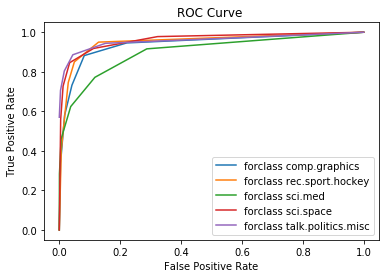

In [188]:
import matplotlib.pyplot as py
l=['forclass comp.graphics',
'forclass rec.sport.hockey',
'forclass sci.med',
'forclass sci.space',
'forclass talk.politics.misc']
for i in range(5):
    fpr, tpr,thresholds= ROC(Actual, Probability_Class[i], pos_label=i)
    py.title("ROC Curve ")
    py.plot(fpr,tpr,label=l[i])
py.xlabel("False Positive Rate")
py.ylabel("True Positive Rate")
py.legend()
py.show()

In [189]:
list1=['comp.graphics',
'rec.sport.hockey',
'sci.med',
'sci.space',
'talk.politics.misc']
Predicted_label1=[]
for i in range(len(Predicted_Label)):
    if Predicted_Label[i][0]==list1[0]:
        Predicted_label1.append(0)
    elif Predicted_Label[i][0]==list1[1]:
        Predicted_label1.append(1)
    elif Predicted_Label[i][0]==list1[2]:
        Predicted_label1.append(2)
    elif Predicted_Label[i][0]==list1[3]:
        Predicted_label1.append(3)
    elif Predicted_Label[i][0]==list1[4]:
        Predicted_label1.append(4)
# Actual_label=[]
# for i in range(len(Actual)):
#     if Actual[i]==list1[0]:
#         Actual_label.append((Actual[i],0))
#     if Actual[i]==list1[1]:
#         Actual_label.append((Actual[i],1))
#     if Actual[i]==list1[2]:
#         Actual_label.append((Actual[i],2))
#     if Actual[i]==list1[3]:
#         Actual_label.append((Actual[i],3))
#     if Actual[i]==list1[4]:
#         Actual_label.append((Actual[i],4))

In [181]:
print(len(Predicted_label1))

2500


In [182]:
print((Actual))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[423.  29.  20.  22.   6.]
[ 32. 404.  45.  11.   8.]
[ 57.  25. 355.  42.  21.]
[ 35.   4.  31. 425.   5.]
[ 16.  20.  31.  27. 406.]


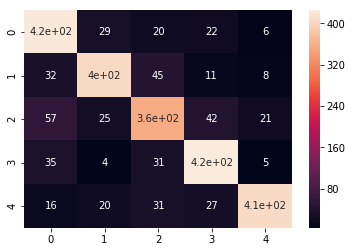

In [190]:
import seaborn as sns
import numpy as np
def ConfusionMatrix(Predicted,Actual):
    confusion_matrix=np.zeros((5,5))
    for i in range(len(Actual)):
        confusion_matrix[int(Actual[i])][int(Predicted[i])]=(confusion_matrix[int(Actual[i])][int(Predicted[i])])+1
    return confusion_matrix
confusion_matrix=ConfusionMatrix(Predicted_label1,Actual)
for i in range(len(confusion_matrix)):
    print(confusion_matrix[i])
sns.heatmap(confusion_matrix,annot=True)